In [1]:
import pandas as pd

In [4]:
pulls_one = pd.read_csv(r'C:\Users\Lenovo\Datacamp Python study sheet\The GitHub History of the Scala Language\pulls_2011-2013.csv')

In [5]:
pulls_one.head()

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


In [6]:
pulls_two = pd.read_csv(r'C:\Users\Lenovo\Datacamp Python study sheet\The GitHub History of the Scala Language\pulls_2014-2018.csv')

In [7]:
pulls_two.head()

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z


In [35]:
pull_files = pd.read_csv(r'C:\Users\Lenovo\Datacamp Python study sheet\The GitHub History of the Scala Language\pull_files.csv')

In [36]:
pull_files.head()

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


In [10]:
pulls = pulls_two.append(pulls_one, ignore_index=True)

In [11]:
pulls['date'] = pd.to_datetime(pulls['date'], utc=True)

In [37]:
data = pulls.merge(pull_files, on='pid')

In [38]:
data.head(10)

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java
5,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumnImpl.java
6,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/Test.scala
7,163061502,joroKr21,2018-01-15 23:44:52+00:00,src/library/scala/concurrent/Lock.scala
8,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/AsyncHelp...
9,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/Profiler....


In [39]:
%matplotlib inline

In [40]:
data['month'] = data['date'].dt.month

In [41]:
data['year'] = data['date'].dt.year

In [42]:
counts = data.groupby(['year','month'])['pid'].count()

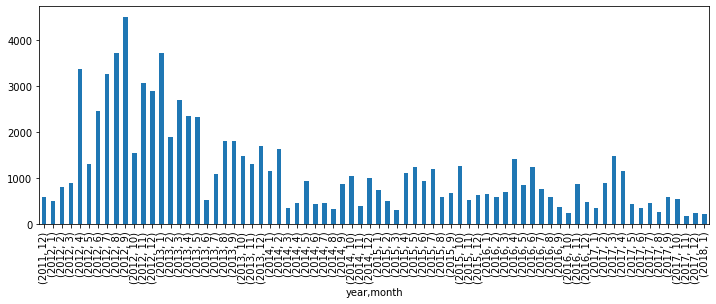

In [43]:
counts.plot(kind='bar', figsize= (12,4))

In [44]:
by_user = data.groupby('user').agg({'pid':'count'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AE630AD708>]],
      dtype=object)

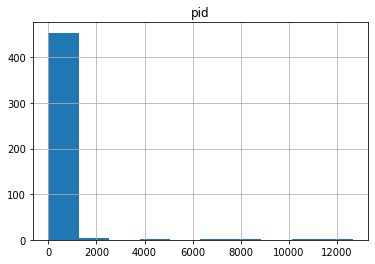

In [45]:
by_user.hist()

In [46]:
last_10 = pulls.sort_values(by = 'date').tail(10)

In [47]:
last_10

,pid,user,date
9,162011899,joroKr21,2018-01-10 00:45:57+00:00
8,162197834,SethTisue,2018-01-10 18:31:25+00:00
7,162256029,mkeskells,2018-01-10 23:20:03+00:00
6,162643301,hrhino,2018-01-12 14:29:49+00:00
5,162765232,howtonotwin,2018-01-13 04:37:17+00:00
4,162838837,zuvizudar,2018-01-14 19:16:16+00:00
3,162985594,lrytz,2018-01-15 15:52:39+00:00
2,163057333,mkeskells,2018-01-15 23:05:06+00:00
1,163061502,joroKr21,2018-01-15 23:44:52+00:00
0,163314316,hrhino,2018-01-16 23:29:16+00:00


In [48]:
joined_pr = pull_files.merge(last_10, on='pid')

In [49]:
files = set(joined_pr['file'])


In [29]:
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

In [50]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

In [51]:
file_pr = pull_files[pull_files['file'] == file]

In [52]:
joined_pr = pulls.merge(file_pr, on='pid')

In [53]:
users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])

In [54]:
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

In [55]:
%matplotlib inline

In [56]:
authors = ['xeno-by','soc']

In [57]:
by_author = pulls[pulls['user'].isin(authors)]

In [60]:
counts = by_author.groupby([by_author['user'], by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

In [61]:
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

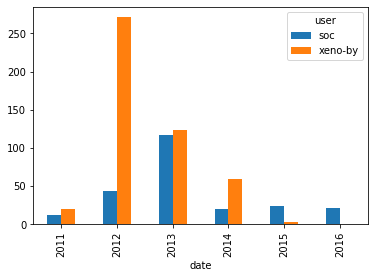

In [62]:
counts_wide.plot(kind='bar')

In [63]:
authors = ['xeno-by', 'soc']

In [64]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

In [65]:
by_author = data[data['user'].isin(authors)]

In [66]:
by_file = by_author[by_author['file'] == file]

In [67]:
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

In [68]:
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

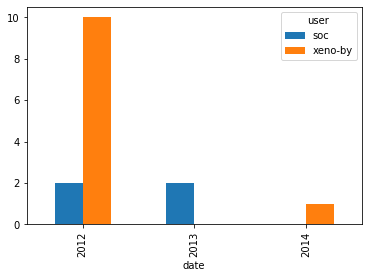

In [69]:
by_file_wide.plot(kind='bar')